# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 9:** Estudo de caso ENEM

# CADERNO DE EXERCÍCIOS - AULA 09

Utilizando as técnicas aprendidas até agora, analise os microdados do ENEM 2020 para responder às perguntas a seguir. Caso seja possível, gere visualizações apropriadas para cada uma delas.

In [95]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [96]:
# Carregando o dataframe
# Encoding cp860 é o encoding para português. utf-8 não lê estes dados.
enem = pd.read_csv('http://dcc.ufmg.br/~flaviovdf/MICRODADOS_ENEM_2020_FILTRADOS.csv')

## 1. Quais os 5 estados brasileiros com maior taxa de ausência (geral) no ENEM 2020?


In [97]:
enem.head()

,NU_INSCRICAO,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_ANO_CONCLUIU,NU_NOTA_REDACAO,NU_NOTA_CN,TP_FAIXA_ETARIA,Q005,Q006,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,TP_ESCOLA
0,200006271946,NaN,0,0,0,0,11,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,1
1,200001195856,NaN,1,1,1,1,11,580.0,604.1,11,NaN,NaN,711.3,661.7,595.3,1
2,200001943954,BA,0,0,0,0,0,NaN,NaN,4,3.0,B,NaN,NaN,NaN,2
3,200001908998,SP,1,1,1,1,0,760.0,620.8,2,NaN,NaN,759.4,675.0,624.2,2
4,200001634757,NaN,0,0,0,0,1,NaN,NaN,4,3.0,B,NaN,NaN,NaN,1


In [98]:
result = enem.query('TP_PRESENCA_CN == 0 & TP_PRESENCA_CH == 0 & TP_PRESENCA_LC == 0 & TP_PRESENCA_MT == 0').groupby('SG_UF_ESC').size().sort_values(ascending=False)
result.head(5)

SG_UF_ESC
SP    62986
CE    48069
MG    22923
RJ    20041
AM    18751
dtype: int64

## 2. Como a probabilidade de um(a) candidato(a) obter nota superior a 600 na redação varia com o tempo desde que ele(a) concluiu o segundo grau? Esta tendência é a mesma observada em Ciências da natureza?

**Ovservação:** O valor da coluna TP_ANO_CONCLUIU já indica o tempo desde a conclusão até prova. Entretanto, o valor 0 não necessariamente indica que o estudante concluiu em 2020! Elimine este valor para análises mais precisas.

<Axes: title={'center': 'natureza'}, xlabel='TP_ANO_CONCLUIU'>

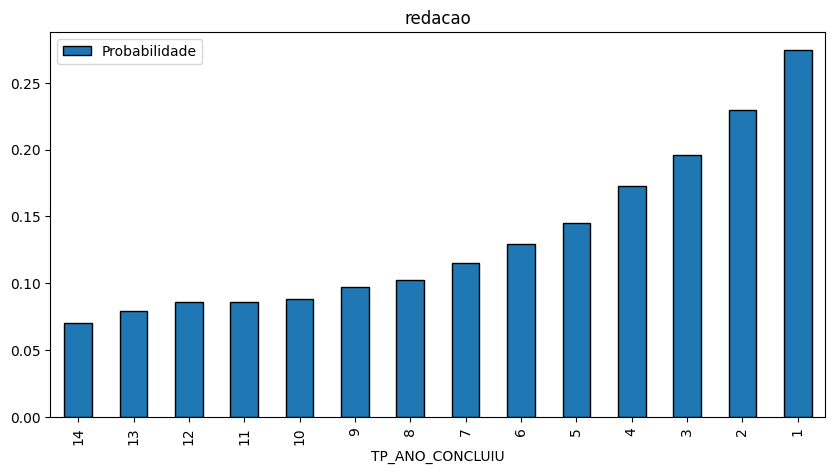

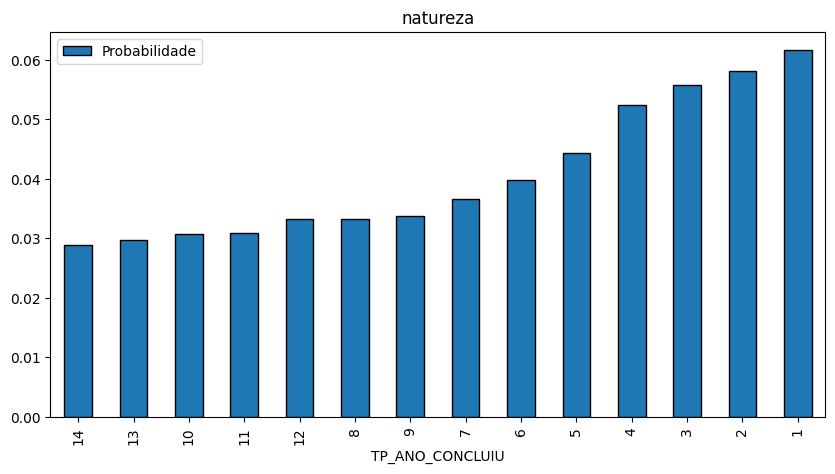

In [99]:
dados_filtrados = enem[['NU_NOTA_REDACAO', 'NU_NOTA_CN','TP_ANO_CONCLUIU']].dropna()
dados_filtrados = enem[enem['TP_ANO_CONCLUIU'] > 0]
total = dados_filtrados.groupby('TP_ANO_CONCLUIU').size()

redacao = dados_filtrados.query('NU_NOTA_REDACAO > 600')
passou = redacao.groupby('TP_ANO_CONCLUIU').size()
novo = (passou/total).sort_values(ascending=True)
novo = pd.DataFrame({'TP_ANO_CONCLUIU': novo.index, 'Probabilidade': novo.values})
novo.plot.bar( x='TP_ANO_CONCLUIU', y='Probabilidade', edgecolor='k', figsize=(10, 5),title='redacao')

natureza = dados_filtrados.query('NU_NOTA_CN > 600')
passou2 = natureza.groupby('TP_ANO_CONCLUIU').size()
novo2 = (passou2/total).sort_values(ascending=True)
novo2 = pd.DataFrame({'TP_ANO_CONCLUIU': novo2.index, 'Probabilidade': novo2.values})
novo2.plot.bar(x='TP_ANO_CONCLUIU', y='Probabilidade', edgecolor='k', figsize=(10, 5),title='natureza')

## 3. Como fatores como renda (Q006), número de pessoas que moram na mesma residência que o candidato (Q005), e a faixa etária (TP_FAIXA_ETARIA) do participante influenciam em sua nota em Matemática?

**Sugestões:** Para análises mais precisas, elimine as notas 0 e os candidatos que faltaram nas provas analisadas (ex:TP_PRESENCA_MT=0). Como as notas são uma escala contínua, você pode optar, se preferir, por torná-la discreta, criando classes que englobem faixas de notas (ex: 200<NU_NOTA_MT<400).

In [114]:
dados_filtrados = enem[(enem['NU_NOTA_MT']> 0) & (enem['TP_PRESENCA_MT'] == 1)]
notas = dados_filtrados[['NU_NOTA_MT', 'Q006', 'Q005', 'TP_FAIXA_ETARIA']]
notas.dropna(subset=['NU_NOTA_MT'], inplace=True)
renda = notas[['NU_NOTA_MT', 'Q006']].groupby('Q006').mean()
residencia = notas[['NU_NOTA_MT', 'Q005']].groupby('Q005').mean()
faixa = notas[['NU_NOTA_MT', 'TP_FAIXA_ETARIA']].groupby('TP_FAIXA_ETARIA').mean()

fig1 = px.scatter(renda, y= 'NU_NOTA_MT',width=1000, height=600, title='Renda x Nota de Matemática')
fig2 = px.scatter(residencia, y= 'NU_NOTA_MT',width=1000, height=600,  title='Residencia x Nota de Matemática')
fig3 = px.scatter(faixa, y= 'NU_NOTA_MT',width=1000, height=600, title='Faixa Etária x Nota de Matemática')
#Para ver o grafico expecifico, basta substituir pelo nome da variavel
fig1
    

/var/folders/q8/9d5d2vtj4832w_98dq64xxr00000gn/T/ipykernel_88217/748749302.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Q006=%{x}<br>NU_NOTA_MT=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
                          'O', 'P', 'Q'], dtype=object),
              'xaxis': 'x',
              'y': array([454.40723892, 471.92182529, 500.96730751, 518.61294142, 540.76291982,
                          550.99077179, 572.47042949, 590.5721021 , 603.28496363, 613.06537748,
                          622.37182924, 627.28080891, 634.72748414, 643.3977455 , 651.59360203,
                          662.46771877, 678.34104003]),
              'yaxis': 'y'}],
    'layout': {'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Renda x Nota de Matemática'},
               'width': 1000,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Q006'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'NU_NOTA_MT'}}}
})